In [1]:
#SGD posterior sampler
import numpy as np
from scipy.linalg import sqrtm
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random
%matplotlib inline
def PosteriorSampling(data, loglikelihood, gradient, initialPoint, K, maxIter, burnin = 1000, wait = 1000, 
       seed = None, verbose = True):
    '''
    Perform stochastic gradient descent to maximize objective.
    
    Args:
    data             - 2d array of n * m, a set of samples
    loglikelihood    - function handle, return log likelihood log p(X|theta)
    gradient         - function handle, return gradient of log likelihood
    initialPoint     - array of dimension d, starting point
    K                - integer, subsampling size
    burnin           - numeric, burnin period
    wait             - numeric, waiting period
    maxIter          - integer, the iterations
    seed             - integer, seed
    verbose          - boolean, whether to print intermediate results
    
    Returns:
    trajectory   - 2d array of (maxIter - burnin)/wait * d, the record of x
    '''
    if isinstance(initialPoint, float):
        d = 1
    else:
        d = len(initialPoint)
    n, m = np.shape(data) #n is total number of samples, m is their dimension
    if seed is not None:
        np.random.seed(seed)
    trajectory = np.zeros(((maxIter - burnin)//wait, d))
    theta      = initialPoint
    ind = 0
    for iter in range(1, maxIter):
        candidates = np.random.choice(n, K, replace = True)
        #grads = np.zeros((K, d))
        #for i in range(K):
            #print(i, data[candidates[i],:], len(data[candidates[i],:]), theta, gradient(data[candidates[i],:], theta))
            #grads[i,:] = np.reshape(gradient(data[candidates[i],:], theta), (-1,))
        grads = calc_grad(data, theta, candidates)
        mean = np.mean(grads, axis = 0)
        covM = np.cov(grads, rowvar=False)
        #print(theta)
        #plt.hist(grads[:,0])
        #plt.show()
        # stepsize = 2 * K * inv(covM)
        theta = theta + 2 * np.dot(inv(covM), mean)
        if theta[1] < 1e-1:
            theta[1] = 1e-1
        if theta[1] > 1.9:
            theta[1] = 1.9
        #print(iter, theta)
        if iter >= burnin and (iter - burnin) % wait == 0:
            trajectory[ind] = theta
            ind += 1
    return trajectory

In [174]:

theta = np.asarray([0, 1])
data = np.reshape(np.random.randn(1000), (-1, 1))
K = 100
d = 2
candidates = np.random.choice(1000, K, replace = True)
gradient      = lambda x, coef: np.reshape(np.asarray([2 * (x - coef[0]) / coef[1], (x - coef[0])**2 / coef[1]** 2 - 1/coef[1]]), (-1,1))
calc_grad(data, theta, candidates)
grads = np.zeros((K, d))
for i in range(K):
            #print(i, data[candidates[i],:], len(data[candidates[i],:]), theta, gradient(data[candidates[i],:], theta))
            grads[i,:] = np.reshape(gradient(data[candidates[i],:], theta), (-1,))

0.0162149454109 0.90138552498
999


/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


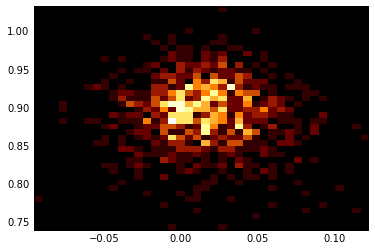

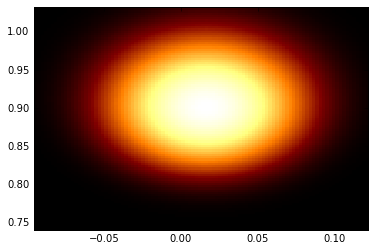

In [49]:
def calc_grad(data, theta, candidates):
    mu = theta[0]
    sigma2 = theta[1]
    out1 = (data[candidates,:] - mu) / sigma2 * 2
    out2 = out1**2/4 - 1/sigma2
    grads = np.column_stack((out1, out2))
    return grads
def loglikelihood(data, theta):
    out1 = - (data - theta[0]) ** 2 / theta[1] - np.log(theta[1])
    return(out1)
    
def PosteriorSampling_UnitTest1():
    #loglikelihood = lambda x, coef: -(x - coef[0]) ** 2 / coef[1] - np.log(coef[1])
    #gradient      = lambda x, coef: np.reshape(np.asarray([2 * (x - coef[0]) / coef[1], (x - coef[0])**2 / coef[1]** 2 - 1/coef[1]]), (-1,1))
    data = np.reshape(np.concatenate([np.random.randn(500),np.random.randn(500) + 0]), (-1, 1))
    print(np.mean(data), np.var(data))
    output = PosteriorSampling(data, loglikelihood, calc_grad, np.asarray([0, 1]), 1000, int(1e6))
    print(len(output))
    plt.figure()
    plt.hist2d(output[0:1e3, 0], output[:1e3, 1], bins=40, cmap='afmhot')
    #plt.colorbar()
    plt.show()
    xmin = min(output[:, 0])
    xmax = max(output[:, 0])
    ymin = min(output[:, 1])
    ymax = max(output[:, 1])
    n = 100
    xaxis = np.linspace(xmin, xmax, n)
    yaxis = np.linspace(ymin, ymax, n)
    #print(xaxis, yaxis)
    density = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            density[n -1 - j, i] = np.mean(loglikelihood(data, [xaxis[i], yaxis[j]]))
    #print(np.max(density, axis = (0, 1)))
    dmin = np.min(density, axis=(0, 1))
    dmax = np.max(density, axis=(0, 1))
    from scipy.stats import rankdata
    tmp = np.reshape(rankdata(density)**3, np.shape(density))
    plt.imshow(tmp, extent = (xmin, xmax, ymin, ymax), cmap='afmhot', interpolation='nearest', aspect='auto')
    plt.show()
PosteriorSampling_UnitTest1()

In [183]:
np.cov([[1, 2], [3, 4], [6, 3]], rowvar=False)
a = np.zeros((2, 2))
a[1,:] = np.asarray([1, 2])
np.reshape([[1], [2]], (2, ))
np.random.randn(1)/np.sqrt(1000)

array([ 0.02077697])

In [188]:
np.concatenate([[1, 3], [4]])

array([1, 3, 4])

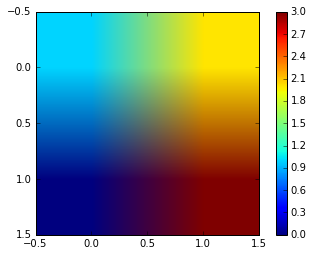

In [17]:
img = [[1, 2], [0, 3]]
plt.imshow(img)
plt.colorbar()